In [ ]:
import numpy as np  # Importing NumPy library for numerical operations, especially for handling arrays and matrices.
import pandas as pd  # Importing Pandas library for data manipulation and analysis, especially for handling tabular data.
import matplotlib.pyplot as plt  # Importing Matplotlib's pyplot module for creating static, interactive, and animated visualizations.
import seaborn as sns  # Importing Seaborn library for statistical data visualization based on Matplotlib, making plots more attractive and easier to understand.

In [ ]:
df  = pd.read_csv("/content/AIDS_Classification_50000.csv")
df

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1073,1,37,79.46339,0,1,0,100,0,1,...,1,2,0,1,0,322,469,882,754,1
1,324,0,33,73.02314,0,1,0,90,0,1,...,1,3,1,1,1,168,575,1035,1525,1
2,495,1,43,69.47793,0,1,0,100,0,1,...,1,1,0,0,0,377,333,1147,1088,1
3,1201,3,42,89.15934,0,1,0,100,1,1,...,1,3,0,0,0,238,324,775,1019,1
4,934,0,37,137.46581,0,1,0,100,0,0,...,0,3,0,0,1,500,443,1601,849,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,953,3,46,61.28204,0,0,0,90,0,1,...,1,3,0,1,1,234,402,481,1014,0
49996,1036,0,42,73.36768,0,1,0,100,0,1,...,1,3,0,0,1,369,575,514,657,0
49997,1157,0,40,78.75824,0,1,0,100,0,1,...,1,1,0,1,0,308,663,1581,863,0
49998,596,0,31,52.20371,0,0,0,100,0,1,...,1,1,0,1,1,349,440,470,865,1


In [ ]:
df.infected.value_counts()  # Counting the number of occurrences of each unique value in the 'infected' column of the DataFrame.
# This helps understand how many samples belong to each category (e.g., infected vs. not infected).

,count
infected,
0,34494
1,15506


In [ ]:
df.info()  # Displaying concise summary information about the DataFrame.
# This includes the number of rows, columns, data types of each column, and the amount of non-null values in each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      50000 non-null  int64  
 1   trt       50000 non-null  int64  
 2   age       50000 non-null  int64  
 3   wtkg      50000 non-null  float64
 4   hemo      50000 non-null  int64  
 5   homo      50000 non-null  int64  
 6   drugs     50000 non-null  int64  
 7   karnof    50000 non-null  int64  
 8   oprior    50000 non-null  int64  
 9   z30       50000 non-null  int64  
 10  preanti   50000 non-null  int64  
 11  race      50000 non-null  int64  
 12  gender    50000 non-null  int64  
 13  str2      50000 non-null  int64  
 14  strat     50000 non-null  int64  
 15  symptom   50000 non-null  int64  
 16  treat     50000 non-null  int64  
 17  offtrt    50000 non-null  int64  
 18  cd40      50000 non-null  int64  
 19  cd420     50000 non-null  int64  
 20  cd80      50000 non-null  in

In [ ]:
df.duplicated().sum()  # Checking for duplicate rows in the DataFrame.
# The duplicated() method returns a boolean Series indicating duplicate rows.
# The sum() function counts the number of True values in the Series, which represents the total number of duplicate rows.

0

In [ ]:
df.corr()  # Calculating the correlation matrix of the DataFrame.
# The corr() method computes pairwise correlation of columns, showing how strongly each pair of features is related.
# The result is a matrix with correlation coefficients ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation).

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
time,1.000000,0.051746,0.006911,0.039390,-0.019287,0.056241,-0.012310,0.021562,-0.021745,-0.074956,...,-0.078147,-0.068901,-0.019133,0.068051,-0.101019,0.040720,0.089658,0.018400,0.026256,-0.102671
trt,0.051746,1.000000,0.040517,0.010247,0.002240,0.064000,-0.005980,-0.038132,-0.004581,-0.001674,...,0.000497,0.003392,-0.018105,0.232762,-0.027697,0.013352,0.028357,-0.004262,0.019198,-0.047112
age,0.006911,0.040517,1.000000,0.001856,-0.017836,0.108080,0.002495,-0.046430,0.011142,0.118811,...,0.121492,0.109482,0.001566,0.041837,-0.049142,-0.053918,-0.065441,0.005863,-0.001756,0.028718
wtkg,0.039390,0.010247,0.001856,1.000000,-0.034036,0.089131,-0.016851,0.008592,-0.004932,-0.106208,...,-0.104913,-0.092254,0.004827,0.001226,-0.029979,0.047813,0.066893,0.019929,-0.006143,-0.055527
hemo,-0.019287,0.002240,-0.017836,-0.034036,1.000000,-0.068466,0.001203,-0.002599,0.013915,0.064002,...,0.062104,0.063511,-0.002698,0.008057,0.011043,-0.034345,-0.034451,-0.004844,-0.004207,0.026407
homo,0.056241,0.064000,0.108080,0.089131,-0.068466,1.000000,-0.051067,-0.011770,0.008095,-0.013145,...,-0.010187,0.010497,0.022002,0.072673,-0.103003,0.000200,-0.010264,0.025367,-0.004070,-0.007341
drugs,-0.012310,-0.005980,0.002495,-0.016851,0.001203,-0.051067,1.000000,0.010188,-0.010457,-0.033090,...,-0.040928,-0.045483,0.000906,-0.009026,0.037158,0.025400,0.027702,-0.005788,0.006794,-0.025684
karnof,0.021562,-0.038132,-0.046430,0.008592,-0.002599,-0.011770,0.010188,1.000000,0.000356,-0.131726,...,-0.136562,-0.130202,0.008108,-0.053328,-0.025224,0.045776,0.062692,0.023325,0.013964,-0.025860
oprior,-0.021745,-0.004581,0.011142,-0.004932,0.013915,0.008095,-0.010457,0.000356,1.000000,0.058107,...,0.065423,0.070862,0.017419,-0.011640,-0.008963,-0.041128,-0.042355,0.006786,-0.010503,0.043416
z30,-0.074956,-0.001674,0.118811,-0.106208,0.064002,-0.013145,-0.033090,-0.131726,0.058107,1.000000,...,0.605567,0.573218,0.022249,0.010907,-0.007565,-0.217151,-0.284487,-0.018809,0.001278,0.238531


<ipython-input-42-624747534cd3>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")  # Applies the 'seaborn-whitegrid' style to all plots for a cleaner look


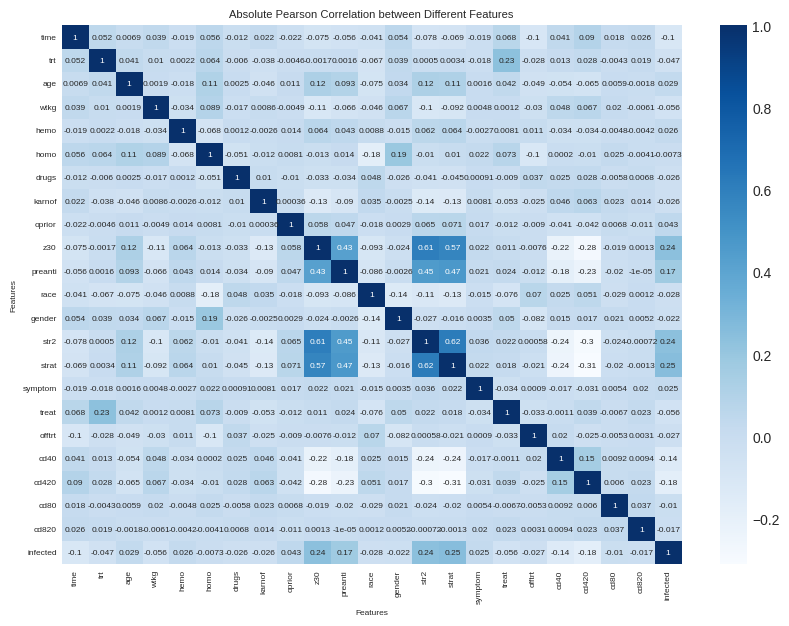

In [ ]:
pd.plotting.register_matplotlib_converters()  # Registers converters for date plotting compatibility with matplotlib
import matplotlib.pyplot as plt  # Imports the matplotlib library for creating visualizations
import seaborn as sns  # Imports the seaborn library, which provides advanced data visualization functionalities

plt.style.use("seaborn-whitegrid")  # Applies the 'seaborn-whitegrid' style to all plots for a cleaner look

plt.figure(figsize=(10, 7))  # Creates a new figure with a size of 10x7 inches
sns.heatmap(df.corr(), annot=True, cmap="Blues", annot_kws={"size": 6})
# Generates a heatmap using the correlation matrix of the DataFrame 'df'
# 'annot=True' displays the correlation values on the heatmap
# 'cmap="Blues"' sets the color map to shades of blue
# 'annot_kws={"size": 6}' adjusts the font size of the annotations to 6

plt.title('Absolute Pearson Correlation between Different Features', fontsize=8)
# Sets the title of the heatmap with a font size of 8

plt.xlabel('Features', fontsize=6)  # Sets the x-axis label with a font size of 6
plt.ylabel('Features', fontsize=6)  # Sets the y-axis label with a font size of 6

plt.xticks(fontsize=6)  # Adjusts the font size of the x-axis tick labels to 6
plt.yticks(fontsize=6)  # Adjusts the font size of the y-axis tick labels to 6

plt.savefig("correlation_heatmap.jpg", dpi=500, format='jpg', bbox_inches='tight')
# Saves the plot as a JPG image with 500 DPI resolution, ensuring tight layout fitting with 'bbox_inches'

plt.show()  # Displays the heatmap

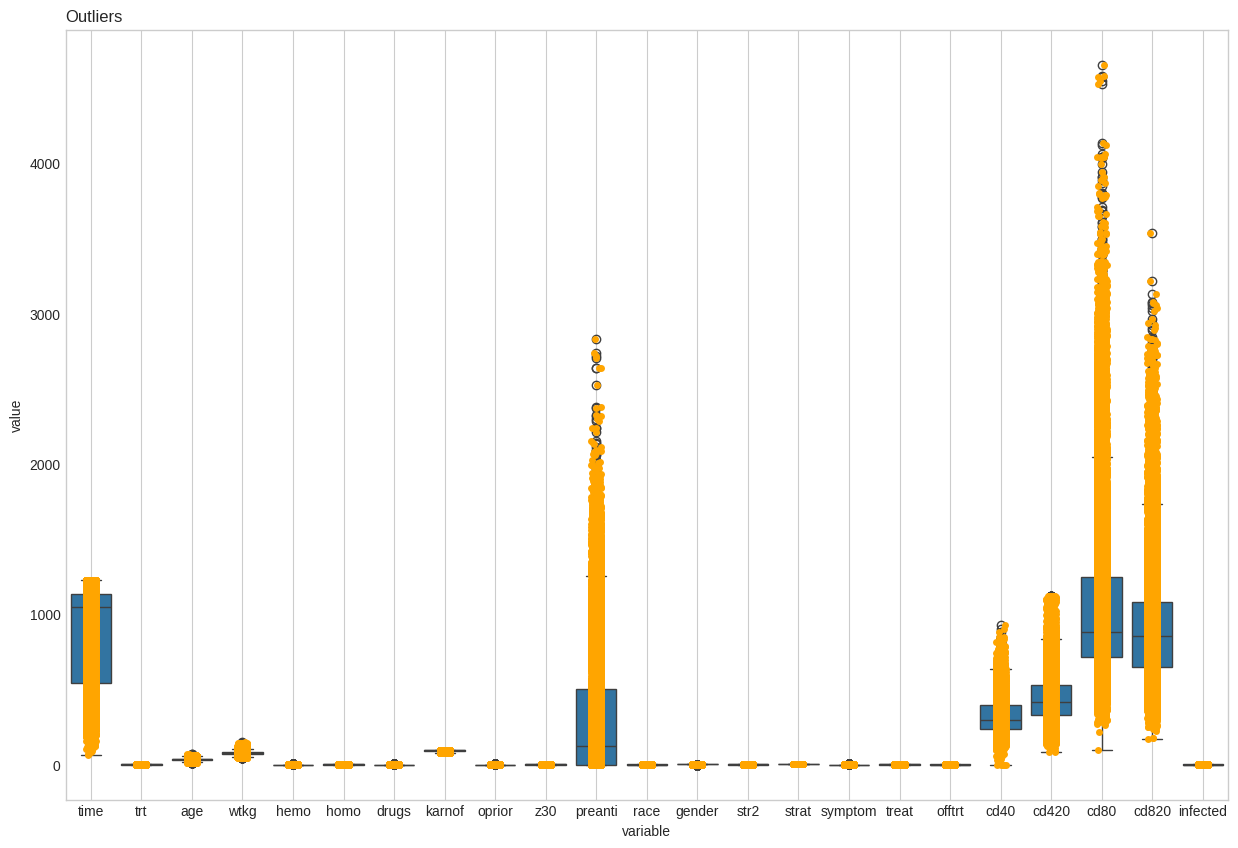

In [ ]:
# Importing the 'matplotlib.pyplot' library for creating visualizations
import matplotlib.pyplot as plt

# Setting the size of the figure (the canvas for the plot) to be 15 inches wide and 10 inches tall
plt.figure(figsize=(15, 10))

# Creating a boxplot to visualize the distribution of values in each column of the DataFrame
# 'x="variable"' represents the column names, 'y="value"' represents the data in each column
# 'pd.melt(df)' is reshaping the DataFrame to make it suitable for the boxplot
sns.boxplot(x="variable", y="value", data=pd.melt(df))

# Adding a strip plot to show individual data points on top of the boxplot
# 'color="orange"' makes the data points orange for better visibility
sns.stripplot(x="variable", y="value", data=pd.melt(df), color="orange")

# Setting the title of the plot as "Outliers" and aligning the title to the left side of the plot
plt.title("Outliers", loc="left")

# Displaying gridlines on the plot to make it easier to see the position of data points
plt.grid()

## Pre-processing: Fixing the Outliers of the dataset

In [ ]:
# Detecting Outliers

# Calculating the first quartile (25th percentile) for each column in the DataFrame
# The first quartile represents the value below which 25% of the data falls
Q1 = df.quantile(0.25)

# Calculating the third quartile (75th percentile) for each column in the DataFrame
# The third quartile represents the value below which 75% of the data falls
Q3 = df.quantile(0.75)

# Calculating the Interquartile Range (IQR) for each column
# The IQR is the range between the 25th percentile (Q1) and 75th percentile (Q3)
# It helps to identify the spread of the middle 50% of the data
IQR = Q3 - Q1

# Printing the IQR values for each column to see the spread of the middle 50% of data
print(IQR)

time        594.000000
trt           3.000000
age          10.000000
wtkg         12.888503
hemo          0.000000
homo          1.000000
drugs         0.000000
karnof       10.000000
oprior        0.000000
z30           1.000000
preanti     503.000000
race          1.000000
gender        0.000000
str2          1.000000
strat         2.000000
symptom       0.000000
treat         1.000000
offtrt        1.000000
cd40        160.000000
cd420       204.000000
cd80        532.000000
cd820       435.000000
infected      1.000000
dtype: float64


In [ ]:
# Finding features where the Interquartile Range (IQR) is greater than 2

# Selecting columns (features) where the IQR is greater than 2
# This helps to identify features with a large spread in the middle 50% of the data
features_with_large_IQR = IQR[IQR > 2].index.tolist()

# Printing the names of the features (columns) that have an IQR greater than 2
print("Features with IQR greater than 2:", features_with_large_IQR)

Features with IQR greater than 2: ['time', 'trt', 'age', 'wtkg', 'karnof', 'preanti', 'strat', 'cd40', 'cd420', 'cd80', 'cd820']


Outlier handling for all features with IQR greater than 2

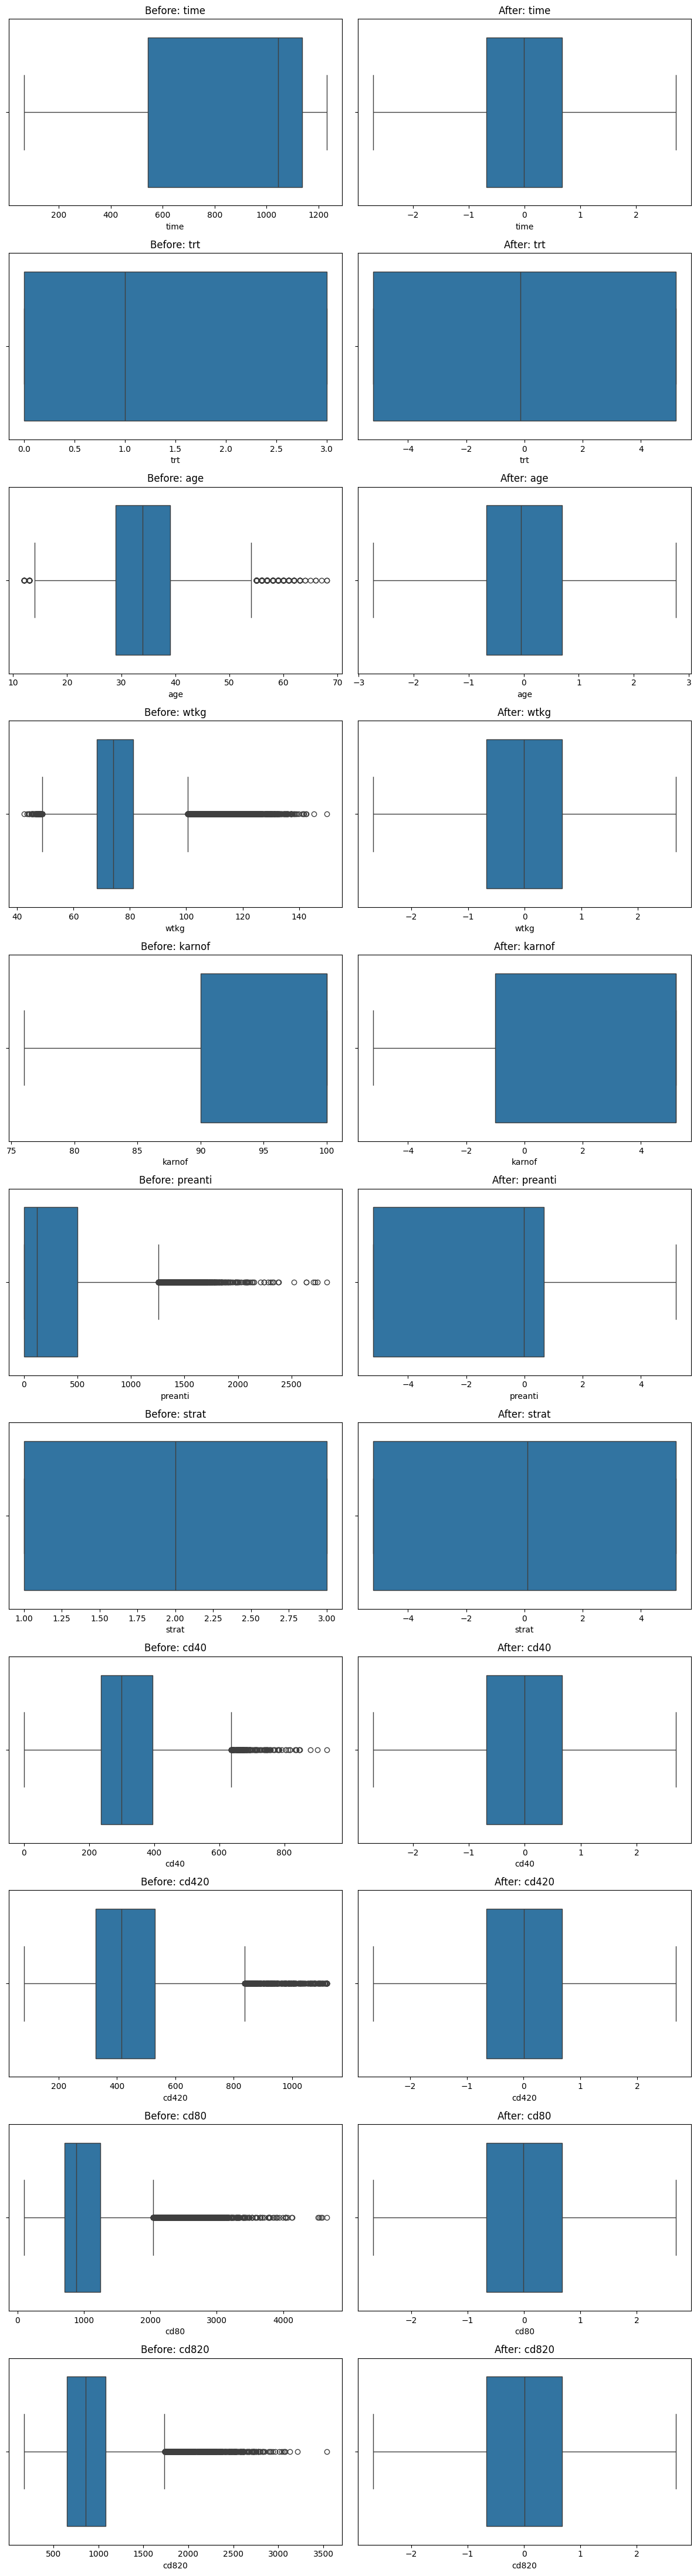

In [ ]:
# Importing necessary libraries
import numpy as np                     # For numerical operations
import seaborn as sns                  # For creating visualizations
import matplotlib.pyplot as plt        # For plotting graphs
from sklearn.preprocessing import QuantileTransformer  # For transforming data into a normal distribution

# List of column names to apply the QuantileTransformer and outlier capping
columns = ['time', 'trt', 'age', 'wtkg', 'karnof', 'preanti', 'strat', 'cd40', 'cd420', 'cd80', 'cd820']

# Storing the original data in 'original_df' to keep it unchanged for comparison
original_df = df.copy()

# Creating a copy of the DataFrame 'df' to apply transformations, and storing it in 'new_df'
new_df = df.copy()

# Initializing the QuantileTransformer with normal distribution output
qt_normal = QuantileTransformer(output_distribution='normal')

# Looping through each column to apply the transformation and capping of outliers
for column in columns:
    # Applying the QuantileTransformer to the column data
    new_df[column] = qt_normal.fit_transform(df[[column]])

    # Calculating the Interquartile Range (IQR) for the transformed data
    percentile25 = new_df[column].quantile(0.25)  # 25th percentile (Q1)
    percentile75 = new_df[column].quantile(0.75)  # 75th percentile (Q3)
    iqr = percentile75 - percentile25             # Interquartile Range (IQR)

    # Defining upper and lower limits to identify outliers (1.5 times the IQR)
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    # Capping values above the upper limit and below the lower limit
    # If a value is greater than the upper limit, it will be set to the upper limit
    # If a value is less than the lower limit, it will be set to the lower limit
    new_df[column] = np.where(
        new_df[column] > upper_limit,
        upper_limit,  # Capping the upper outliers
        np.where(
            new_df[column] < lower_limit,
            lower_limit,  # Capping the lower outliers
            new_df[column]  # Keeping the values within the limits unchanged
        )
    )

# Creating subplots to compare boxplots of original vs. transformed data for each column

# 'nrows' is the number of rows, one for each column, and 'ncols=2' means two plots side by side
fig, axes = plt.subplots(nrows=len(columns), ncols=2, figsize=(12, len(columns)*4))

# Looping through each column to plot boxplots
for i, column in enumerate(columns):
    # Plotting the original data before transformation in the left column
    sns.boxplot(x=original_df[column], ax=axes[i, 0])
    axes[i, 0].set_title(f'Before: {column}')  # Adding a title for the original data

    # Plotting the transformed data after applying the QuantileTransformer and capping in the right column
    sns.boxplot(x=new_df[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'After: {column}')  # Adding a title for the transformed data

# Adjusting the layout to avoid overlap between plots
plt.tight_layout()

# Saving the plot as a high-resolution image file named 'boxplots_before_after.jpg'
plt.savefig('boxplots_before_after.jpg', dpi=400)

# Displaying the plot on the screen
plt.show()

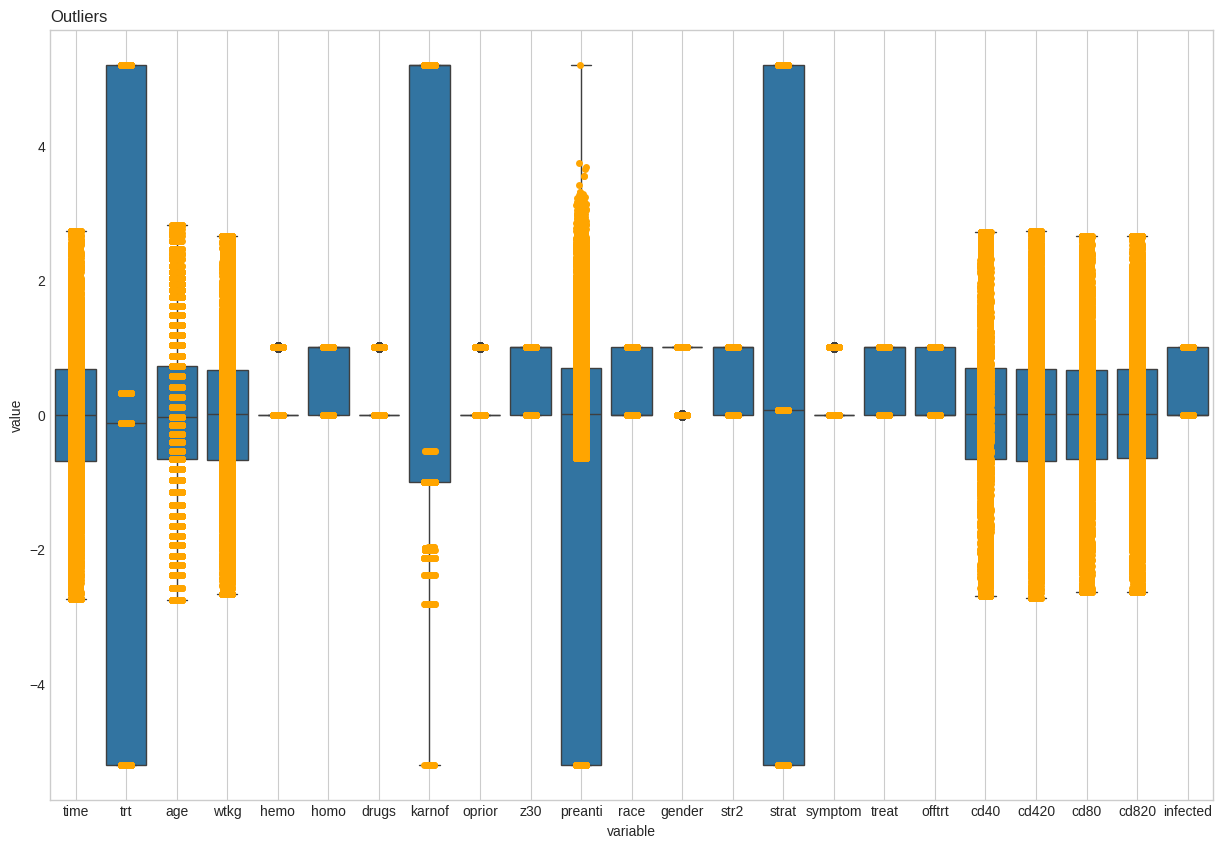

In [ ]:
# Visualize each column in a boxplot and detection of outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(new_df))
sns.stripplot(x="variable", y="value", data=pd.melt(new_df), color="orange")
plt.title("Outliers", loc="left")
plt.grid()

##Feature Selection

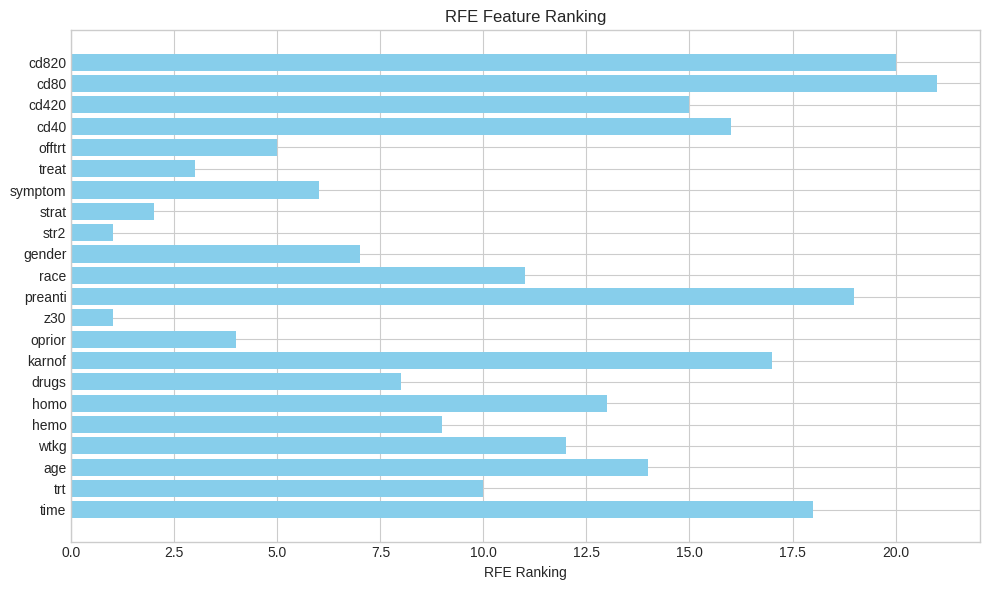

In [ ]:
# Importing necessary libraries
import numpy as np                   # For numerical operations
import pandas as pd                  # For data manipulation and analysis
import matplotlib.pyplot as plt       # For plotting graphs
from sklearn.feature_selection import RFE  # For Recursive Feature Elimination (RFE)
from sklearn.linear_model import LogisticRegression  # For Logistic Regression model

# Splitting the DataFrame 'df' into features (X) and target (y)
# 'X' contains all columns except the last one (features)
# 'y' contains the last column (target variable)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Initializing the Logistic Regression model
# 'solver="liblinear"' is used because it works well for small datasets
model_rfe = LogisticRegression(solver='liblinear')

# Initializing Recursive Feature Elimination (RFE) with the Logistic Regression model
# 'n_features_to_select=2' means that RFE will select the top 2 most important features
rfe = RFE(estimator=model_rfe, n_features_to_select=2)

# Fitting RFE to the data (X and y) to find feature importance
rfe.fit(X, y)

# Creating a DataFrame to store the feature names and their corresponding RFE rankings
rfe_ranking = pd.DataFrame({
    'Feature': X.columns,        # The names of the features (columns)
    'RFE_Ranking': rfe.ranking_  # The RFE ranking for each feature (1 means most important)
})

# Plotting the RFE Rankings using a horizontal bar plot
plt.figure(figsize=(10, 6))  # Setting the figure size to 10x6 inches

# Creating a bar plot with feature names on the y-axis and their RFE rankings on the x-axis
plt.barh(rfe_ranking['Feature'], rfe_ranking['RFE_Ranking'], color='skyblue')

# Adding labels and title to the plot
plt.xlabel('RFE Ranking')  # Label for the x-axis
plt.title('RFE Feature Ranking')  # Title of the plot

# Adjusting the layout to ensure everything fits well on the plot
plt.tight_layout()

# Saving the plot as a high-resolution image file named 'RFE_ranking_plot1.jpg'
plt.savefig("RFE_ranking_plot1.jpg", dpi=400, format='jpg', bbox_inches='tight')

# Displaying the plot on the screen
plt.show()

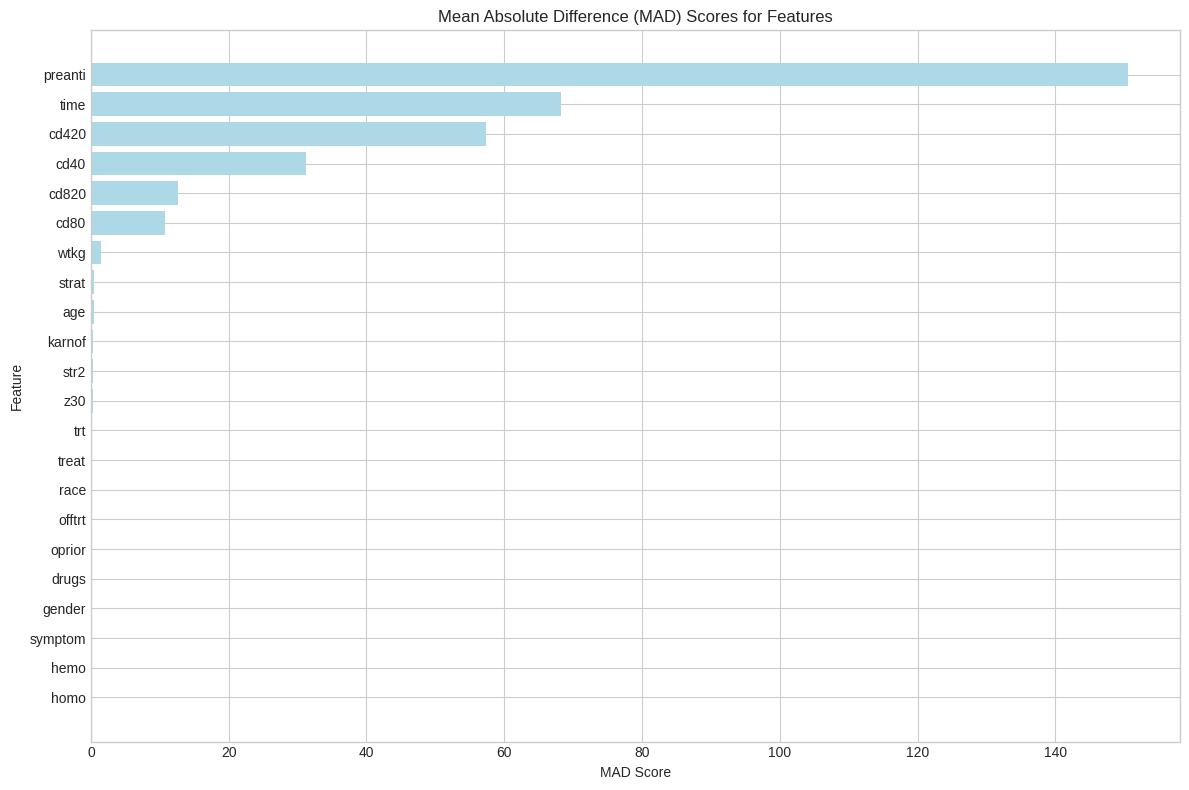

In [ ]:
import pandas as pd  # Importing the pandas library for data manipulation
import matplotlib.pyplot as plt  # Importing matplotlib for plotting

# Function to calculate the Mean Absolute Difference (MAD) for each feature
# 'X' is the DataFrame containing features, 'y' is the target variable
def mean_absolute_difference(X, y):
    mad_scores = []  # List to store MAD scores for each feature

    # Looping through each feature (column) in X
    for feature in X.columns:
        # Group the feature data by the target variable (y) and calculate the mean for each group
        grouped = X.groupby(y)[feature]

        # Calculate the absolute difference between means of the groups and sum them up
        mean_diff = grouped.mean().diff().abs().sum()

        # Store the feature name and its MAD score in the list
        mad_scores.append({'Feature': feature, 'MAD_Score': mean_diff})

    # Convert the list of MAD scores into a pandas DataFrame for easy analysis
    mad_scores_df = pd.DataFrame(mad_scores)
    return mad_scores_df  # Returning the DataFrame containing MAD scores for each feature

# Function to plot the MAD scores
def plot_mad_scores(mad_scores_df):
    plt.figure(figsize=(12, 8))  # Setting the figure size to 12x8 inches

    # Sorting the MAD scores in descending order for better visualization
    mad_scores_df = mad_scores_df.sort_values(by='MAD_Score', ascending=False)

    # Creating a horizontal bar plot of features vs their MAD scores
    plt.barh(mad_scores_df['Feature'], mad_scores_df['MAD_Score'], color='lightblue')

    # Adding labels and a title to the plot
    plt.xlabel('MAD Score')  # Label for the x-axis
    plt.ylabel('Feature')  # Label for the y-axis
    plt.title('Mean Absolute Difference (MAD) Scores for Features')  # Title of the plot

    # Inverting the y-axis so that features with the highest MAD scores appear at the top
    plt.gca().invert_yaxis()

    # Adjusting the layout to ensure everything fits well in the plot
    plt.tight_layout()

    # Saving the plot as a high-resolution image file named 'MAD_ranking.jpg'
    plt.savefig("MAD_ranking.jpg", dpi=400, format='jpg', bbox_inches='tight')

    # Displaying the plot on the screen
    plt.show()

# Generating MAD scores for all features in 'X' relative to the target variable 'y'
mad_scores_df = mean_absolute_difference(X, y)

# Plotting the MAD scores
plot_mad_scores(mad_scores_df)

In [ ]:
# Printing the names of all columns in the 'new_df' DataFrame
# This shows a list of the column names that are present in the 'new_df' DataFrame
print(new_df.columns)

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'infected'],
      dtype='object')


In [ ]:
# Dropping unwanted columns from the 'new_df' DataFrame to create 'Selected_features'
# The 'drop' function removes the specified columns from the DataFrame
# The columns being removed are: 'hemo', 'drugs', 'oprior', 'z30', 'gender', 'str2', 'strat', 'symptom', 'treat', 'offtrt'
Selected_features = new_df.drop(columns=['hemo', 'drugs', 'oprior', 'z30', 'gender', 'str2', 'strat', 'symptom', 'treat', 'offtrt'])

# Printing the resulting DataFrame 'Selected_features' to show the remaining columns and their data
print(Selected_features)

           time       trt       age      wtkg  homo    karnof   preanti  race  \
0      0.115678 -0.139710  0.391137  0.523817     1  5.199338 -0.196979     0   
1     -1.926403 -5.199338 -0.190587 -0.126233     1 -0.997920  0.153631     0   
2     -0.869846 -0.139710  1.286702 -0.531356     1  5.199338 -5.199338     0   
3      2.013671  5.199338  1.147315  1.195534     1  5.199338  0.685456     0   
4     -0.249721 -5.199338  0.391137  2.670391     1  5.199338 -0.516356     0   
...         ...       ...       ...       ...   ...       ...       ...   ...   
49995 -0.223916  5.199338  1.669112 -1.445124     0 -0.997920  1.637850     0   
49996 -0.046436 -5.199338  1.147315 -0.083446     1  5.199338  0.264814     1   
49997  1.012474 -5.199338  0.853480  0.462518     1  5.199338 -5.199338     0   
49998 -0.543789 -5.199338 -0.426601 -2.469667     0  5.199338 -5.199338     1   
49999 -0.512061  0.317650  1.002056  0.314809     1 -0.997920  2.064084     0   

           cd40     cd420  

In [ ]:
Selected_features.shape

(50000, 13)

<ipython-input-10-14b9e85ab8c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="infected",data=df, palette="Reds")


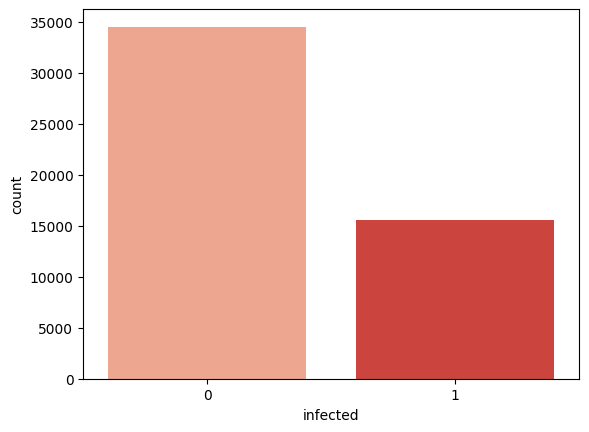

In [ ]:
# Importing the seaborn library for creating a count plot and matplotlib for displaying it
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a count plot to visualize the number of occurrences of each category in the 'infected' column
# 'x="infected"' specifies that the x-axis will represent the 'infected' column from the DataFrame
# 'data=df' specifies that the data is coming from the 'df' DataFrame
# 'palette="Reds"' sets the color scheme of the plot to shades of red
sns.countplot(x="infected", data=df, palette="Reds")

# Displaying the plot on the screen
plt.show()

##Augmentation

In [ ]:
# Identifying features and target variable for modeling

# Extracting the feature columns from the 'Selected_features' DataFrame
# The target variable 'infected' is excluded from 'X'
# 'axis=1' specifies that we are dropping a column (not a row)
X = Selected_features.drop('infected', axis=1)  # Features

# Extracting the target variable 'infected' from the 'Selected_features' DataFrame
# This is the variable we want to predict
y = Selected_features['infected']

In [ ]:
# Importing the RandomOverSampler class from the imbalanced-learn library for handling class imbalance
from imblearn.over_sampling import RandomOverSampler

# Applying oversampling to balance the class distribution in the dataset
# Initializing the RandomOverSampler with a fixed random state for reproducibility
oversampler = RandomOverSampler(random_state=42)

# Using the oversampler to fit and resample the feature matrix 'X' and target vector 'y'
# The result is a balanced dataset with equal number of samples for each class
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

In [ ]:
# Creating a DataFrame for the oversampled data

# Converting the oversampled feature matrix 'X_oversampled' into a DataFrame
# The columns are named according to the original feature names in 'X.columns'
new_df = pd.DataFrame(X_oversampled, columns=X.columns)

# Adding the target variable 'infected' to the DataFrame 'new_df'
# 'y_oversampled' contains the target values for the oversampled data
new_df['infected'] = y_oversampled

<ipython-input-14-1c7a003a3a21>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="infected",data=new_df, palette="Reds")


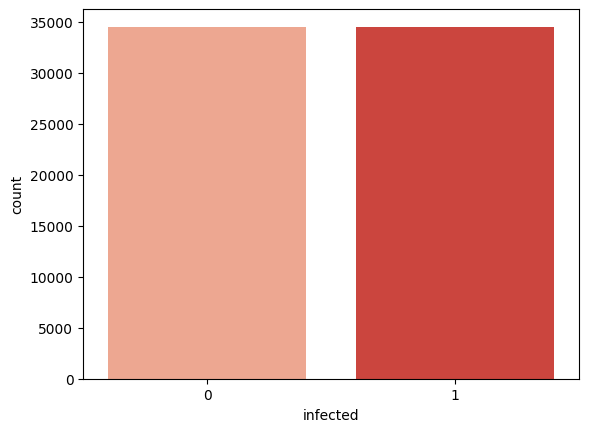

In [ ]:
#check credit.policy
sns.countplot(x="infected",data=new_df, palette="Reds")
plt.show()

#Pre-processing

In [ ]:
# Importing the preprocessing module from scikit-learn for feature scaling
from sklearn import preprocessing

# Initializing the MinMaxScaler to scale features to a range between 0 and 1
# 'fit' calculates the minimum and maximum values needed for scaling
pre_process = preprocessing.MinMaxScaler().fit(X_oversampled)

# Applying the MinMaxScaler to transform the oversampled feature matrix 'X_oversampled'
# 'fit_transform' scales the features based on the min and max values calculated
x_transform = pre_process.transform(X_oversampled)

Training

In [ ]:
# Importing the train_test_split function from scikit-learn for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
# 'x_transform' contains the scaled features, and 'y_oversampled' contains the target variable
# 'test_size=0.10' specifies that 10% of the data will be used for testing, and the rest for training
# 'random_state=101' ensures reproducibility of the split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y_oversampled, test_size=0.10, random_state=101)

#Logistic Regression

In [ ]:
# Import model
from sklearn.linear_model import LogisticRegression

print('Logistic Regression')
# Create instance of model
log_reg = LogisticRegression()

# Pass training data into model
log_reg.fit(x_train, y_train)

Logistic Regression


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_log_reg = log_reg.predict(x_test)
# Score It

print('Logistic Regression')
# Accuracy
print('--'*30)
log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg) * 100,2)
print('Accuracy', log_reg_accuracy,'%')

Logistic Regression
------------------------------------------------------------
Accuracy 62.97 %


Precision: 0.62
Recall: 0.66
------------------------------------------------------------
[[2080 1382]
 [1173 2264]]


<Axes: >

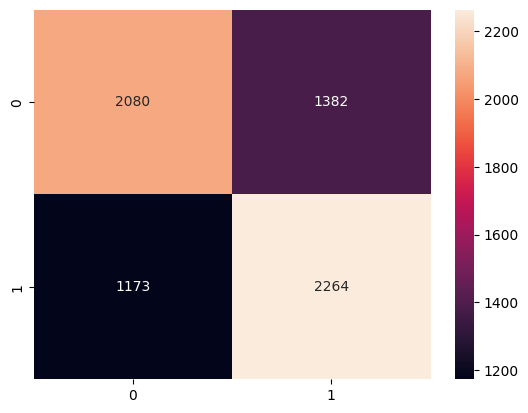

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_log_reg)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d")

#Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

print('Decision Tree Classifier')
# Create instance of model
Dtree = DecisionTreeClassifier()

# Pass training data into model
Dtree.fit(x_train, y_train)

Decision Tree Classifier


DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_Dtree = Dtree.predict(x_test)
# Score It

print('Decision Tree Classifier')
# Accuracy
print('--'*30)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100,2)
print('Accuracy', Dtree_accuracy,'%')

Decision Tree Classifier
------------------------------------------------------------
Accuracy 79.97 %


Precision: 0.75
Recall: 0.91
------------------------------------------------------------


<Axes: >

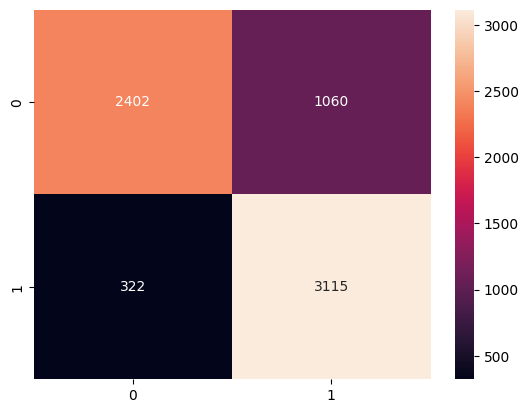

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_Dtree)
recall = recall_score(y_test, y_pred_Dtree)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100,2)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_Dtree)

sns.heatmap(confusion, annot=True, fmt="d")

#Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

print('Random Forest Classifier')
# Create instance of model
rfc = RandomForestClassifier()

# Pass training data into model
rfc.fit(x_train, y_train)

Random Forest Classifier


RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_rfc = rfc.predict(x_test)
# Score It

print('Random Forest Classifier')
# Accuracy
print('--'*30)
rfc_accuracy = round(accuracy_score(y_test, y_pred_rfc) * 100,2)
print('Accuracy', rfc_accuracy,'%')

Random Forest Classifier
------------------------------------------------------------
Accuracy 86.49 %


Precision: 0.84
Recall: 0.90
------------------------------------------------------------


<Axes: >

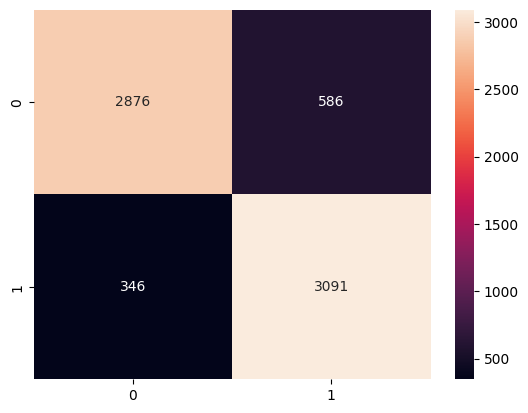

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(confusion, annot=True, fmt="d")

#AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize AdaBoost classifier
ada = AdaBoostClassifier(random_state=14)

# Train the classifier
ada.fit(x_train, y_train)

# Make predictions on the test data
y_pred_ada = ada.predict(x_test)

# Test accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Test Accuracy: {accuracy_ada:.2f}")

# Confusion matrix
print("Confusion Matrix for AdaBoost:\n", confusion_matrix(y_test, y_pred_ada))

# Classification report
print("Classification Report for AdaBoost:\n", classification_report(y_test, y_pred_ada))

AdaBoost Test Accuracy: 0.64
Confusion Matrix for AdaBoost:
 [[2102 1360]
 [1121 2316]]
Classification Report for AdaBoost:
               precision    recall  f1-score   support

           0       0.65      0.61      0.63      3462
           1       0.63      0.67      0.65      3437

    accuracy                           0.64      6899
   macro avg       0.64      0.64      0.64      6899
weighted avg       0.64      0.64      0.64      6899



Precision: 0.63
Recall: 0.67
------------------------------------------------------------


<Axes: >

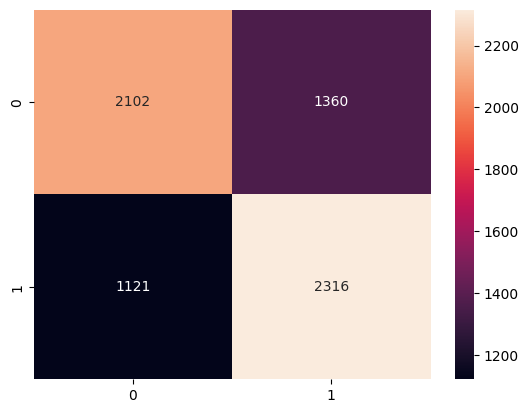

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_ada)
recall = recall_score(y_test, y_pred_ada)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_ada)
sns.heatmap(confusion, annot=True, fmt="d")

#K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Train the classifier
knn.fit(x_train, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(x_test)

# Test accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Test Accuracy: {accuracy_knn:.2f}")

# Confusion matrix
print("Confusion Matrix for KNN:\n", confusion_matrix(y_test, y_pred_knn))

# Classification report
print("Classification Report for KNN:\n", classification_report(y_test, y_pred_knn))


KNN Test Accuracy: 0.66
Confusion Matrix for KNN:
 [[2066 1396]
 [ 966 2471]]
Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.68      0.60      0.64      3462
           1       0.64      0.72      0.68      3437

    accuracy                           0.66      6899
   macro avg       0.66      0.66      0.66      6899
weighted avg       0.66      0.66      0.66      6899



Precision: 0.64
Recall: 0.72
------------------------------------------------------------


<Axes: >

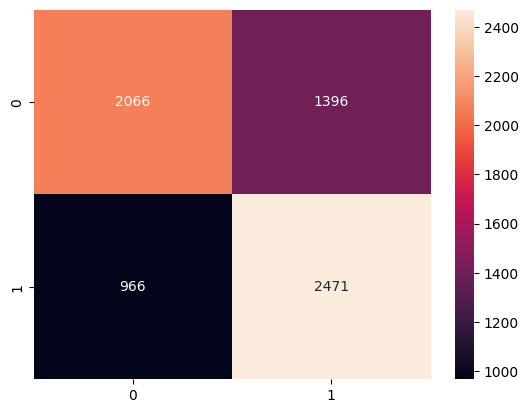

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(confusion, annot=True, fmt="d")

#Proposed Voting Classifier with RFC and DTC

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize individual classifiers
dtc = DecisionTreeClassifier(random_state=14)
rfc = RandomForestClassifier(random_state=14)

# Create the ensemble with a Voting Classifier (using hard voting)
voting_clf = VotingClassifier(estimators=[('DTC', dtc), ('RFC', rfc)], voting='hard')

# Train the ensemble on the training data
voting_clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred = voting_clf.predict(x_test)

# Evaluate the ensemble model's performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[3145  317]
 [ 444 2993]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89      3462
           1       0.90      0.87      0.89      3437

    accuracy                           0.89      6899
   macro avg       0.89      0.89      0.89      6899
weighted avg       0.89      0.89      0.89      6899



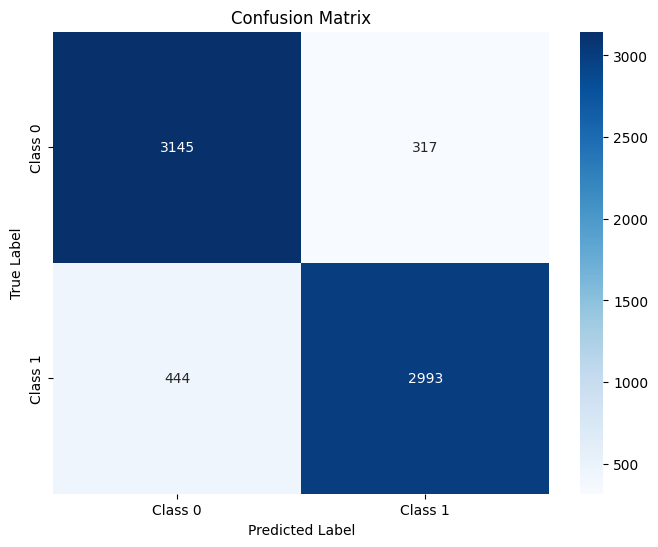

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix.png", dpi=300)
plt.show()

ROC curve

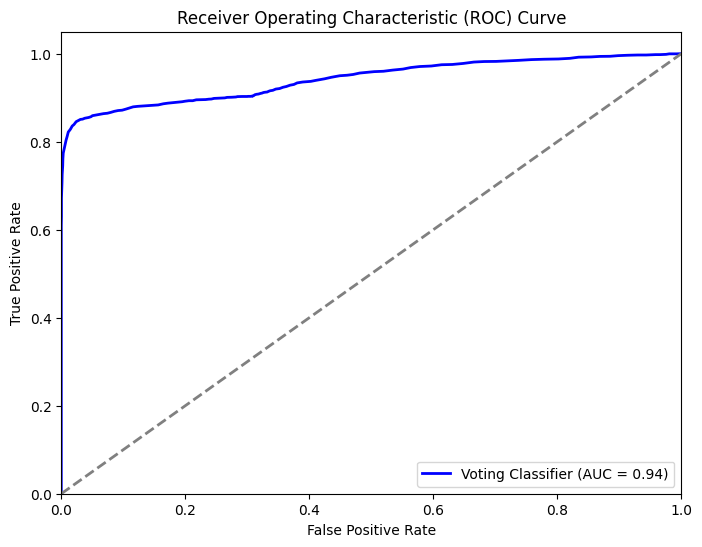

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Create the ensemble with a Voting Classifier (using soft voting)
voting_clf = VotingClassifier(estimators=[('DTC', dtc), ('RFC', rfc)], voting='soft')

# Train the ensemble on the training data
voting_clf.fit(x_train, y_train)

# Predict probabilities
y_pred_prob = voting_clf.predict_proba(x_test)[:, 1]  # Probability for class 1

# Generate ROC curve values (False positive rate, True positive rate)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Voting Classifier (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()